In [1]:
# !pip install catboost
# !pip install pycaret
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import datetime as dt
from pycaret.regression import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.font_manager as fm
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams["figure.figsize"] = (8,4)
mpl.rcParams['axes.grid'] = True 
path = 'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# plt.title('한글제목')
# plt.show()

NanumGothic


In [3]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [4]:
train.shape, test.shape

((1205, 12), (50, 10))

In [5]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [6]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [7]:
train[['현본사소속재택근무자수', '중식계', '석식계']] = train[['현본사소속재택근무자수', '중식계', '석식계']].astype('int')
test['현본사소속재택근무자수'] = test['현본사소속재택근무자수'].astype('int')
train['일자'].min(), train['일자'].max(), test['일자'].min(), test['일자'].max()

('2016-02-01', '2021-01-26', '2021-01-27', '2021-04-09')

####  df  = train, test 

In [8]:
df = train.append(test)

df['일자'] = pd.to_datetime(df['일자'])
# df['년'] = df['일자'].dt.year
# df['월'] = df['일자'].dt.month
# df['일'] = df['일자'].dt.day
# df['주'] = df['일자'].dt.week
# df['요일'] = df['일자'].dt.weekday



df['출근'] = df['본사정원수']-(df['본사휴가자수']+df['본사출장자수']+df['현본사소속재택근무자수'])
df['출근비율'] = df['출근']/df['본사정원수']
df['휴가비율'] = df['본사휴가자수']/df['본사정원수']
df['출장비율'] = df['본사출장자수']/df['본사정원수']
df['야근비율'] = df['본사시간외근무명령서승인건수']/df['출근']
df['재택비율'] = df['현본사소속재택근무자수']/df['본사정원수']

df['중식특식여부'] =  np.where(df['중식메뉴'].str.contains('특식')==True, 1, 0) 
df['자기개발의날여부'] = np.where( (df['석식메뉴'].str.len()<=20) & (df['출근'] >0), 1, 0)

menu_df = df[['일자','중식메뉴','석식메뉴']].copy()
drop_cols = ['요일','조식메뉴','중식메뉴','석식메뉴']
df= df.drop(drop_cols, axis=1)

In [9]:
print(df.shape)
df.tail()

(1255, 16)


,일자,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,출근,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부
45,2021-04-05,2973,125,174,704,331,NaN,NaN,2343,0.788093,0.042045,0.058527,0.300469,0.111335,0,0
46,2021-04-06,2973,76,170,636,364,NaN,NaN,2363,0.794820,0.025563,0.057181,0.269149,0.122435,0,0
47,2021-04-07,2973,96,214,1,334,NaN,NaN,2329,0.783384,0.032291,0.071981,0.000429,0.112344,0,0
48,2021-04-08,2973,105,238,509,324,NaN,NaN,2306,0.775647,0.035318,0.080054,0.220729,0.108981,0,0
49,2021-04-09,2973,259,268,0,229,NaN,NaN,2217,0.745711,0.087117,0.090145,0.000000,0.077027,0,0


## 공휴일 공통함수
<pre>
서비스 URL: http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/{서비스오퍼레이션}

서비스	종류		오퍼레이션명
-----	------	--------------
국경일 정보조회	getHoliDeInfo	01: 국경일 (ex: 어린이날, 광복절, 개천절)
공휴일 정보조회	getRestDeInfo
기념일 정보조회	getAnniversaryInfo	02: 기념일 (ex: 의병의 날, 정보보호의 날, 4/19 혁명 기념일)
24절기 정보조회	get24DivisionsInfo	03: 24절기 (ex: 청명, 경칩, 하지)
잡절   정보조회	getSundryDayInfo	04: 잡절 (ex: 단오, 한식)
</pre>

In [10]:
## 공휴일

import requests
from urllib import parse
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime

def get_holiday(syear=2016, eyear=2021 ) :
    api_key_utf8 = "pLlZwGigTf4euiGFUdQ7ktJfpWwXA5CiHJPPtfQgwx45SHhTgIiEjF4k72HaTqHiet8qB%2F0JYw1XYOUH%2FKlRSw%3D%3D"
    api_key_decode = parse.unquote(api_key_utf8)
    operation_name_list =['getHoliDeInfo'] #,'getAnniversaryInfo','get24DivisionsInfo','getSundryDayInfo']
    
    item_list = []
    for holiday_type in operation_name_list:
        url = "http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/" + holiday_type
        for year in np.arange(syear, eyear+1) : 
            params = {
                "ServiceKey": api_key_decode,
                "solYear": year,
                "numOfRows": 100
            }

            response = requests.get(url, params=params)
            xml = BeautifulSoup(response.text, "lxml")
            items = xml.find('items')
            item_dict = {}
            for item in items:
                item_dict = {
                    "날짜": datetime.strptime(item.find("locdate").text.strip(), '%Y%m%d'),
                    "휴일여부": item.find("isholiday").text.strip(),
#                     "종류" : item.find("datekind").text.strip(),
#                     "이름":  item.find("datename").text.strip()
                }
                item_list.append(item_dict)
            res_df = pd.DataFrame(item_list)
            res_df['휴일여부'] = res_df['휴일여부'].apply(lambda x:  1 if x=='Y' else 0)
    return res_df

#### min date ~ max date 날짜 전체 

In [11]:
start_date = pd.to_datetime(df['일자'].min())  #.year
end_date = pd.to_datetime(df['일자'].max())   #.year
print(start_date, end_date)
dates = pd.date_range(start_date,end_date,freq='D') 
date_df = pd.DataFrame({'날짜':dates})
date_df.head()

2016-02-01 00:00:00 2021-04-09 00:00:00


,날짜
0,2016-02-01
1,2016-02-02
2,2016-02-03
3,2016-02-04
4,2016-02-05


#### min date ~ max date 날짜 사이의 공휴일

* ('2016-02-01'월 ~ '2021-01-26'화)
* ('2021-01-27'수 ~ '2021-04-09'금)

In [12]:
before_dataset = pd.to_datetime(df.loc[0,'일자']).min() - dt.timedelta(days=1)  #'2016-01-31' 일요일 
after_dataset = df.iloc[-1]["일자"] + dt.timedelta(days=1)   #'2021-04-10' 토요일
before_dataset = before_dataset.strftime("%Y-%m-%d")
after_dataset = after_dataset.strftime("%Y-%m-%d")
before_dataset, after_dataset
before_dataset_holiday = 1
after_dataset_holiday = 1

In [13]:
start_year = pd.to_datetime(before_dataset).year  
end_year = pd.to_datetime(after_dataset).year   
holiday_df = get_holiday(start_year,end_year)
holiday_df.head()

,날짜,휴일여부
0,2016-01-01,1
1,2016-02-07,1
2,2016-02-08,1
3,2016-02-09,1
4,2016-02-10,1


#### 달력만들기 : 날짜 전체 , 공휴일 merge, 년, 월, 일, 주, 요일 피쳐 추가

In [14]:
cal_df = pd.merge(date_df, holiday_df , how='left', on='날짜')
cal_df.fillna(0, inplace=True)

cal_df['년'] = cal_df['날짜'].dt.year
cal_df['월'] = cal_df['날짜'].dt.month
cal_df['일'] = cal_df['날짜'].dt.day
cal_df['주'] = cal_df['날짜'].dt.week
cal_df['요일'] = cal_df['날짜'].dt.weekday

cal_df.loc[(cal_df['요일']==5) | (cal_df['요일']==6), '휴일여부'] = 1
cal_df['휴일여부'] = cal_df['휴일여부'].astype('int')
cal_df['전일휴일'] = cal_df['휴일여부'].shift(1)
cal_df['다음날휴일'] = cal_df['휴일여부'].shift(-1)
cal_df['전일휴일'] = cal_df['전일휴일'].fillna(before_dataset_holiday).astype('int')
cal_df['다음날휴일'] = cal_df['다음날휴일'].fillna(after_dataset_holiday).astype('int')
cal_df['전후휴일'] = ((cal_df['전일휴일'] + cal_df['다음날휴일'])> 0).astype('int')
cal_df['코로나발생'] = cal_df['년'].apply(lambda x:  1 if x>=2020 else 0)
cal_df.tail(20)

,날짜,휴일여부,년,월,일,주,요일,전일휴일,다음날휴일,전후휴일,코로나발생
1876,2021-03-21,1,2021,3,21,11,6,1,0,1,1
1877,2021-03-22,0,2021,3,22,12,0,1,0,1,1
1878,2021-03-23,0,2021,3,23,12,1,0,0,0,1
1879,2021-03-24,0,2021,3,24,12,2,0,0,0,1
1880,2021-03-25,0,2021,3,25,12,3,0,0,0,1
1881,2021-03-26,0,2021,3,26,12,4,0,1,1,1
1882,2021-03-27,1,2021,3,27,12,5,0,1,1,1
1883,2021-03-28,1,2021,3,28,12,6,1,0,1,1
1884,2021-03-29,0,2021,3,29,13,0,1,0,1,1
1885,2021-03-30,0,2021,3,30,13,1,0,0,0,1


#### 임시공휴일 추가

In [15]:
#     2016-05-06 //임시공휴일
#     2017-05-01 //근로자의날
#     2018-05-01
#     2019-05-01

cal_df.at[cal_df[cal_df['날짜']== '2016-05-06'].index, '휴일여부'] = 1
cal_df.at[cal_df[cal_df['날짜']== '2017-05-01'].index, '휴일여부'] = 1
cal_df.at[cal_df[cal_df['날짜']== '2018-05-01'].index, '휴일여부'] = 1
cal_df.at[cal_df[cal_df['날짜']== '2019-05-01'].index, '휴일여부'] = 1
cal_df.at[cal_df[cal_df['날짜']== '2020-05-01'].index, '휴일여부'] = 1

#### 달력(기준) , 식수정보 merge

In [16]:
cdf = pd.merge(cal_df, df,
             how='left', # left, rigth, inner (default), outer
             left_on='날짜', right_on='일자')

cdf.head()

,날짜,휴일여부,년,월,일,주,요일,전일휴일,다음날휴일,전후휴일,코로나발생,일자,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,출근,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부
0,2016-02-01,0,2016,2,1,5,0,1,0,1,0,2016-02-01,2601.0,50.0,150.0,238.0,0.0,1039.0,331.0,2401.0,0.923106,0.019223,0.057670,0.099125,0.0,0.0,0.0
1,2016-02-02,0,2016,2,2,5,1,0,0,0,0,2016-02-02,2601.0,50.0,173.0,319.0,0.0,867.0,560.0,2378.0,0.914264,0.019223,0.066513,0.134146,0.0,0.0,0.0
2,2016-02-03,0,2016,2,3,5,2,0,0,0,0,2016-02-03,2601.0,56.0,180.0,111.0,0.0,1017.0,573.0,2365.0,0.909266,0.021530,0.069204,0.046934,0.0,0.0,0.0
3,2016-02-04,0,2016,2,4,5,3,0,0,0,0,2016-02-04,2601.0,104.0,220.0,355.0,0.0,978.0,525.0,2277.0,0.875433,0.039985,0.084583,0.155907,0.0,0.0,0.0
4,2016-02-05,0,2016,2,5,5,4,0,1,1,0,2016-02-05,2601.0,278.0,181.0,34.0,0.0,925.0,330.0,2142.0,0.823529,0.106882,0.069589,0.015873,0.0,0.0,0.0


In [17]:
cdf = cdf.drop('일자', axis=1)

### 식당운영여부 : Outlier 기간
* 2020년.06.15 ~ 2020.06.30
*       ['2018-09-27', '2018-09-28', '2018-10-01', '2018-10-02','2018-10-04', '2018-10-05', '2019-10-01', 
        '2020-06-15','2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-22', '2020-06-23', 
        '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-29','2020-06-30', 
       '2020-09-29','2020-12-28', '2020-12-29','2020-12-30', '2020-12-31']

In [18]:
cdf['식당운영여부'] = 1
cdf['식당운영여부']=cdf[(~cdf['날짜'].isin(df['일자'].values)) & (~cdf['요일'].isin([5,6])) & (cdf['휴일여부']==0)]['식당운영여부'].apply(lambda x:0).astype('int')
cdf['식당운영여부']=cdf['식당운영여부'].fillna(0).astype('int')
#cdf[(~cdf['날짜'].isin(df['일자'].values)) & (~cdf['요일'].isin([5,6])) & (cdf['휴일여부']==0)]['날짜']
#cdf.loc[1580:1613]

In [19]:
cdf.at[0,'전일휴일'] = before_dataset_holiday
cdf.at[cdf.shape[0]-1,'다음날휴일'] =  after_dataset_holiday

In [20]:
csum_holiday = 0
cdf["연속휴일수"] = 0
for i in np.arange(cdf.shape[0]-1, 0, -1):
    if cdf.iloc[i]['휴일여부']==1:
        csum_holiday +=1
    else :
        if cdf.iloc[i]['다음날휴일']==1 :
            cdf.at[i,'연속휴일수'] = csum_holiday
            csum_holiday = 0
cdf.at[cdf.shape[0]-1,'연속휴일수'] = 2
cdf.head(10)  

,날짜,휴일여부,년,월,일,주,요일,전일휴일,다음날휴일,전후휴일,코로나발생,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,출근,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부,식당운영여부,연속휴일수
0,2016-02-01,0,2016,2,1,5,0,1,0,1,0,2601.0,50.0,150.0,238.0,0.0,1039.0,331.0,2401.0,0.923106,0.019223,0.057670,0.099125,0.0,0.0,0.0,0,0
1,2016-02-02,0,2016,2,2,5,1,0,0,0,0,2601.0,50.0,173.0,319.0,0.0,867.0,560.0,2378.0,0.914264,0.019223,0.066513,0.134146,0.0,0.0,0.0,0,0
2,2016-02-03,0,2016,2,3,5,2,0,0,0,0,2601.0,56.0,180.0,111.0,0.0,1017.0,573.0,2365.0,0.909266,0.021530,0.069204,0.046934,0.0,0.0,0.0,0,0
3,2016-02-04,0,2016,2,4,5,3,0,0,0,0,2601.0,104.0,220.0,355.0,0.0,978.0,525.0,2277.0,0.875433,0.039985,0.084583,0.155907,0.0,0.0,0.0,0,0
4,2016-02-05,0,2016,2,5,5,4,0,1,1,0,2601.0,278.0,181.0,34.0,0.0,925.0,330.0,2142.0,0.823529,0.106882,0.069589,0.015873,0.0,0.0,0.0,0,5
5,2016-02-06,1,2016,2,6,5,5,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
6,2016-02-07,1,2016,2,7,5,6,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
7,2016-02-08,1,2016,2,8,6,0,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
8,2016-02-09,1,2016,2,9,6,1,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
9,2016-02-10,1,2016,2,10,6,2,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


### 추가 파생변수
<pre>
<!-- 요일 평균 변수 : 전주 같은 요일 식사 인원
전주 인원 식수 변수 : 전주의 실제 식수 인원
식수 가능 인원 변수 : 식사 가능 이용자(현재)
월 평균 변수 : 월별 평균 식수 인원(월 평균 변수)
이벤트 여부 관련 변수값 부여 예시 : 이벤트있는날식수평균    이벤트없는날식수평균 -->

In [21]:
# cdf["중식계"].groupby(cdf["요일"]).mean().sort_values(ascending=False)
중식계_요일별가중치_dict = {0:5,1:4,2:3,3:2,4:1,5:0,6:0}
cdf['중식계_요일별가중치'] = cdf['요일'].map(중식계_요일별가중치_dict)

In [22]:
# cdf["석식계"].groupby(cdf["요일"]).mean().sort_values(ascending=False)
석식계_요일별가중치_dict = {0:5,1:4,3:3,4:2,2:1,5:0,6:0}
cdf['석식계_요일별가중치'] = cdf['요일'].map(석식계_요일별가중치_dict)

In [23]:
# cdf["중식계"].groupby(cdf["월"]).mean().sort_values(ascending=False)
중식계_월별가중치_dict = {3: 12,2: 11,1:10,11: 9,4: 8,7: 7,8: 6,9: 5,5:4,10: 3,12: 2,6: 1}
cdf['중식계_월별가중치'] = cdf['월'].map(중식계_월별가중치_dict)

In [24]:
# cdf["석식계"].groupby(cdf["월"]).mean().sort_values(ascending=False).to_dict()
석식계_월별가중치_dict = {3: 12,2: 11,4:10,8: 9,11: 8,7: 7,5:6,9: 5,1: 4,10: 3,6: 2,12: 1}
cdf['석식계_월별가중치'] = cdf['월'].map(석식계_월별가중치_dict)

In [25]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 1895
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   날짜              1896 non-null   datetime64[ns]
 1   휴일여부            1896 non-null   int32         
 2   년               1896 non-null   int64         
 3   월               1896 non-null   int64         
 4   일               1896 non-null   int64         
 5   주               1896 non-null   int64         
 6   요일              1896 non-null   int64         
 7   전일휴일            1896 non-null   int32         
 8   다음날휴일           1896 non-null   int32         
 9   전후휴일            1896 non-null   int32         
 10  코로나발생           1896 non-null   int64         
 11  본사정원수           1255 non-null   float64       
 12  본사휴가자수          1255 non-null   float64       
 13  본사출장자수          1255 non-null   float64       
 14  본사시간외근무명령서승인건수  1255 non-null   float64       
 15  현본사소

In [26]:
# cdf.iloc[1697:1710]

In [27]:
# ss= cdf[cdf['연속휴일수'] >0][['연속휴일수','중식계']].sort_values(by='연속휴일수', ascending=False)
# ss.groupby(by=ss['연속휴일수']).mean() 

* 전일휴일(휴가후) :  중식, 석식 영향x
* 다음날휴일       : 중식, 석식  --> 적다

In [28]:
cdf[cdf['전일휴일']==0][['중식계','석식계','출근비율']].describe()    # mean	820.222820	440.263724 0.840403
# cdf[cdf['전일휴일']==1][['중식계','석식계','출근비율']].describe()    # 1126.326087	534.170290 0.843871
# cdf[cdf['다음날휴일']==0][['중식계','석식계','출근비율']].describe()  # 957.940797	482.195910 0.855120
# cdf[cdf['다음날휴일']==1][['중식계','석식계','출근비율']].describe()  # 662.775362	393.028986 0.794219

,중식계,석식계,출근비율
count,929.000000,929.000000,969.000000
mean,820.222820,440.263724,0.840403
std,158.070705,136.871252,0.052628
min,311.000000,0.000000,0.595318
25%,717.000000,386.000000,0.813165
50%,831.000000,462.000000,0.859783
75%,926.000000,524.000000,0.880818
max,1336.000000,905.000000,0.918799


In [29]:
cdf.isna().sum()

날짜                  0
휴일여부                0
년                   0
월                   0
일                   0
주                   0
요일                  0
전일휴일                0
다음날휴일               0
전후휴일                0
코로나발생               0
본사정원수             641
본사휴가자수            641
본사출장자수            641
본사시간외근무명령서승인건수    641
현본사소속재택근무자수       641
중식계               691
석식계               691
출근                641
출근비율              641
휴가비율              641
출장비율              641
야근비율              641
재택비율              641
중식특식여부            641
자기개발의날여부          641
식당운영여부              0
연속휴일수               0
중식계_요일별가중치          0
석식계_요일별가중치          0
중식계_월별가중치           0
석식계_월별가중치           0
dtype: int64

In [30]:
# cdf = cdf.set_index('날짜')
cdf.head(10)

,날짜,휴일여부,년,월,일,주,요일,전일휴일,다음날휴일,전후휴일,코로나발생,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,출근,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부,식당운영여부,연속휴일수,중식계_요일별가중치,석식계_요일별가중치,중식계_월별가중치,석식계_월별가중치
0,2016-02-01,0,2016,2,1,5,0,1,0,1,0,2601.0,50.0,150.0,238.0,0.0,1039.0,331.0,2401.0,0.923106,0.019223,0.057670,0.099125,0.0,0.0,0.0,0,0,5,5,11,11
1,2016-02-02,0,2016,2,2,5,1,0,0,0,0,2601.0,50.0,173.0,319.0,0.0,867.0,560.0,2378.0,0.914264,0.019223,0.066513,0.134146,0.0,0.0,0.0,0,0,4,4,11,11
2,2016-02-03,0,2016,2,3,5,2,0,0,0,0,2601.0,56.0,180.0,111.0,0.0,1017.0,573.0,2365.0,0.909266,0.021530,0.069204,0.046934,0.0,0.0,0.0,0,0,3,1,11,11
3,2016-02-04,0,2016,2,4,5,3,0,0,0,0,2601.0,104.0,220.0,355.0,0.0,978.0,525.0,2277.0,0.875433,0.039985,0.084583,0.155907,0.0,0.0,0.0,0,0,2,3,11,11
4,2016-02-05,0,2016,2,5,5,4,0,1,1,0,2601.0,278.0,181.0,34.0,0.0,925.0,330.0,2142.0,0.823529,0.106882,0.069589,0.015873,0.0,0.0,0.0,0,5,1,2,11,11
5,2016-02-06,1,2016,2,6,5,5,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,11,11
6,2016-02-07,1,2016,2,7,5,6,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,11,11
7,2016-02-08,1,2016,2,8,6,0,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,5,5,11,11
8,2016-02-09,1,2016,2,9,6,1,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4,4,11,11
9,2016-02-10,1,2016,2,10,6,2,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,1,11,11


Index(['중식계', '중식계_요일별가중치', '전일휴일', '야근비율', '본사시간외근무명령서승인건수', '석식계_요일별가중치',
       '석식계', '출근비율', '출근', '중식계_월별가중치', '석식계_월별가중치', '재택비율', '현본사소속재택근무자수',
       '전후휴일', '코로나발생', '중식특식여부', '자기개발의날여부', '년', '일', '본사정원수'],
      dtype='object')


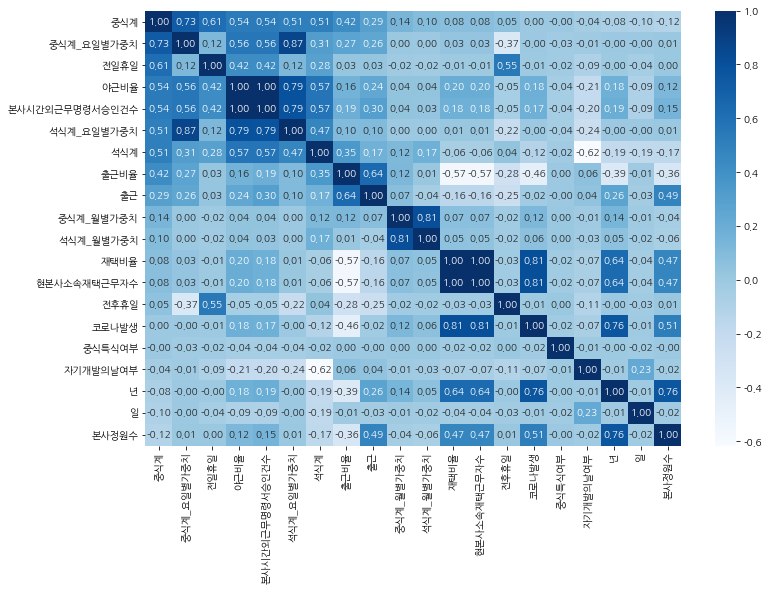

In [31]:
중식계_corr_feature  = cdf.corr().nlargest(20, '중식계').index
print(중식계_corr_feature)
plt.figure(figsize=(12,8))
sns.heatmap(cdf[중식계_corr_feature].corr(), annot=True, cmap='Blues', fmt='0.2f')
plt.show()

In [32]:
print(cdf.corrwith(cdf["중식계"]).sort_values(ascending=False)[:5])
print(cdf.corrwith(cdf["중식계"]).sort_values(ascending=False)[-5:])

중식계               1.000000
중식계_요일별가중치        0.734273
전일휴일              0.614227
야근비율              0.535956
본사시간외근무명령서승인건수    0.535611
dtype: float64
연속휴일수    -0.530475
다음날휴일    -0.592279
요일       -0.734273
휴일여부           NaN
식당운영여부         NaN
dtype: float64


In [33]:
print(cdf.corrwith(cdf["석식계"]).sort_values(ascending=False)[:5])
print(cdf.corrwith(cdf["석식계"]).sort_values(ascending=False)[-5:])

석식계               1.000000
야근비율              0.572467
본사시간외근무명령서승인건수    0.571168
중식계               0.508287
석식계_요일별가중치        0.473611
dtype: float64
요일         -0.313240
본사휴가자수     -0.316894
자기개발의날여부   -0.616197
휴일여부             NaN
식당운영여부           NaN
dtype: float64


In [34]:
cdf.head()

,날짜,휴일여부,년,월,일,주,요일,전일휴일,다음날휴일,전후휴일,코로나발생,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,출근,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부,식당운영여부,연속휴일수,중식계_요일별가중치,석식계_요일별가중치,중식계_월별가중치,석식계_월별가중치
0,2016-02-01,0,2016,2,1,5,0,1,0,1,0,2601.0,50.0,150.0,238.0,0.0,1039.0,331.0,2401.0,0.923106,0.019223,0.057670,0.099125,0.0,0.0,0.0,0,0,5,5,11,11
1,2016-02-02,0,2016,2,2,5,1,0,0,0,0,2601.0,50.0,173.0,319.0,0.0,867.0,560.0,2378.0,0.914264,0.019223,0.066513,0.134146,0.0,0.0,0.0,0,0,4,4,11,11
2,2016-02-03,0,2016,2,3,5,2,0,0,0,0,2601.0,56.0,180.0,111.0,0.0,1017.0,573.0,2365.0,0.909266,0.021530,0.069204,0.046934,0.0,0.0,0.0,0,0,3,1,11,11
3,2016-02-04,0,2016,2,4,5,3,0,0,0,0,2601.0,104.0,220.0,355.0,0.0,978.0,525.0,2277.0,0.875433,0.039985,0.084583,0.155907,0.0,0.0,0.0,0,0,2,3,11,11
4,2016-02-05,0,2016,2,5,5,4,0,1,1,0,2601.0,278.0,181.0,34.0,0.0,925.0,330.0,2142.0,0.823529,0.106882,0.069589,0.015873,0.0,0.0,0.0,0,5,1,2,11,11


### 카레고리화

In [35]:
# cdf.loc[:, ['월', '일', '주', '요일']] = cdf.loc[:, ['월', '일', '주', '요일']].astype('str')
# cdf.info()


In [36]:
# cdf = pd.get_dummies(cdf)
# cdf.shape

In [37]:
cdf[cdf['코로나발생']==0]['중식계'].mean(), cdf[cdf['코로나발생']==1]['중식계'].mean(), 

(890.1694560669456, 890.9678714859438)

In [38]:
cdf[cdf['코로나발생']==0]['석식계'].mean(), cdf[cdf['코로나발생']==1]['석식계'].mean(), 

(470.48012552301253, 428.3413654618474)

In [39]:
cdf[['년','석식계']].groupby("년").mean(), cdf[['년','중식계']].groupby("년").mean()

(             석식계
 년               
 2016  519.418502
 2017  457.049180
 2018  463.539749
 2019  445.386179
 2020  430.668103
 2021  396.588235,
               중식계
 년                
 2016   932.792952
 2017   897.614754
 2018   882.903766
 2019   850.512195
 2020   882.267241
 2021  1009.705882)

## 1. 달력형 train 원본 test

In [40]:
# ((1205, 12), (50, 10))
train['일자'].min(), train['일자'].max(), test['일자'].min(), test['일자'].max()

('2016-02-01', '2021-01-26', '2021-01-27', '2021-04-09')

In [41]:
cdf_train = cdf[cdf['날짜'] <= train['일자'].max()]
cdf_test = cdf[cdf['날짜'] > train['일자'].max()]
# cdf_test = cdf_test.drop(['중식계','석식계'], axis=1)
print(cdf_train.shape, cdf_test.shape)
# print(cdf_train['날짜'].min(), cdf_train['날짜'].max(), cdf_test['날짜'].min(), cdf_test['날짜'].max())

(1823, 32) (73, 32)


In [42]:
cdf_train.shape, cdf_test.shape

((1823, 32), (73, 32))

In [43]:
cdf_train.head()

,날짜,휴일여부,년,월,일,주,요일,전일휴일,다음날휴일,전후휴일,코로나발생,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,출근,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부,식당운영여부,연속휴일수,중식계_요일별가중치,석식계_요일별가중치,중식계_월별가중치,석식계_월별가중치
0,2016-02-01,0,2016,2,1,5,0,1,0,1,0,2601.0,50.0,150.0,238.0,0.0,1039.0,331.0,2401.0,0.923106,0.019223,0.057670,0.099125,0.0,0.0,0.0,0,0,5,5,11,11
1,2016-02-02,0,2016,2,2,5,1,0,0,0,0,2601.0,50.0,173.0,319.0,0.0,867.0,560.0,2378.0,0.914264,0.019223,0.066513,0.134146,0.0,0.0,0.0,0,0,4,4,11,11
2,2016-02-03,0,2016,2,3,5,2,0,0,0,0,2601.0,56.0,180.0,111.0,0.0,1017.0,573.0,2365.0,0.909266,0.021530,0.069204,0.046934,0.0,0.0,0.0,0,0,3,1,11,11
3,2016-02-04,0,2016,2,4,5,3,0,0,0,0,2601.0,104.0,220.0,355.0,0.0,978.0,525.0,2277.0,0.875433,0.039985,0.084583,0.155907,0.0,0.0,0.0,0,0,2,3,11,11
4,2016-02-05,0,2016,2,5,5,4,0,1,1,0,2601.0,278.0,181.0,34.0,0.0,925.0,330.0,2142.0,0.823529,0.106882,0.069589,0.015873,0.0,0.0,0.0,0,5,1,2,11,11


In [44]:
cdf_test.head()

,날짜,휴일여부,년,월,일,주,요일,전일휴일,다음날휴일,전후휴일,코로나발생,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,출근,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부,식당운영여부,연속휴일수,중식계_요일별가중치,석식계_요일별가중치,중식계_월별가중치,석식계_월별가중치
1823,2021-01-27,0,2021,1,27,4,2,0,0,0,1,2983.0,88.0,182.0,5.0,358.0,NaN,NaN,2355.0,0.789474,0.029501,0.061012,0.002123,0.120013,0.0,0.0,0,0,3,1,10,4
1824,2021-01-28,0,2021,1,28,4,3,0,0,0,1,2983.0,104.0,212.0,409.0,348.0,NaN,NaN,2319.0,0.777405,0.034864,0.071069,0.176369,0.116661,0.0,0.0,0,0,2,3,10,4
1825,2021-01-29,0,2021,1,29,4,4,0,1,1,1,2983.0,270.0,249.0,0.0,294.0,NaN,NaN,2170.0,0.727456,0.090513,0.083473,0.000000,0.098558,0.0,0.0,0,2,1,2,10,4
1826,2021-01-30,1,2021,1,30,4,5,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,10,4
1827,2021-01-31,1,2021,1,31,4,6,1,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,10,4


In [45]:
# cdf_train = cdf_train.drop('날짜', axis=1)
# cdf_test = cdf_test.drop('날짜', axis=1)

# 예측 모델

### pycaret
* ref : https://pycaret.readthedocs.io/en/latest/api/classification.html

### 중식계 예측

In [46]:
reg = setup(data=cdf_train,
            target='중식계',
            numeric_imputation = 'mean',
            normalize = True,
            data_split_shuffle= False,
            silent= True,
           normalize_method='robust'  #minmax
           )

,Description,Value
0,session_id,275
1,Target,중식계
2,Original Data,"(1823, 32)"
3,Missing Values,True
4,Numeric Features,17
5,Categorical Features,13
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(852, 41)"


In [47]:
best_5_l = compare_models(sort='MAE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,65.2489,7380.7919,85.4695,0.8105,0.1085,0.0803,1.6720
huber,Huber Regressor,65.8697,7498.2812,86.0223,0.8032,0.1066,0.0794,0.0270
gbr,Gradient Boosting Regressor,65.9891,7363.4590,85.6230,0.8093,0.1059,0.0796,0.1180
br,Bayesian Ridge,66.2306,7455.1618,85.8710,0.8048,0.1060,0.0800,0.0070
ridge,Ridge Regression,66.2800,7469.6637,85.9508,0.8041,0.1060,0.0800,0.0050
rf,Random Forest Regressor,67.1308,7695.6388,87.0040,0.8024,0.1089,0.0821,0.2640
lasso,Lasso Regression,67.6383,7756.6926,87.5764,0.8005,0.1101,0.0826,0.0080
par,Passive Aggressive Regressor,67.8740,8132.5950,89.9703,0.7890,0.1114,0.0818,0.0070
et,Extra Trees Regressor,68.9778,8046.4592,89.4201,0.7925,0.1114,0.0839,0.2150
lightgbm,Light Gradient Boosting Machine,69.0905,8134.2923,89.7239,0.7895,0.1134,0.0846,0.1160


In [48]:
# 중식계 앙상블 모델
blended_l = blend_models(estimator_list= best_5_l, fold=5, optimize='MAE')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)
pred_esb_l = predict_model(final_model_l, cdf_test)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,69.5662,8311.3534,91.1666,0.7132,0.0981,0.0776
1,58.7756,5699.7014,75.4964,0.8556,0.0889,0.0673
2,59.4680,6015.9756,77.5627,0.8525,0.1023,0.0739
3,64.4784,6914.2502,83.1520,0.8381,0.1033,0.0768
4,68.0180,8054.9103,89.7492,0.8376,0.1250,0.0930
Mean,64.0612,6999.2382,83.4254,0.8194,0.1035,0.0777
SD,4.3628,1048.7053,6.2806,0.0536,0.0119,0.0085


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,87.4902,14551.9204,120.6313,0.7064,0.1498,0.1030


In [49]:
pred_esb_l['Label'].head()  #1015.6541368668343

1823     991.258704
1824     889.070709
1825     671.362017
1826    1064.926077
1827    1220.446840
Name: Label, dtype: float64

In [50]:
## 석식계 예측

In [51]:
reg = setup(data=cdf_train,
            target='석식계',
            numeric_imputation = 'mean',
            normalize = True,
            data_split_shuffle= False,
            silent= True,
           normalize_method='robust'  #minmax
           )

,Description,Value
0,session_id,3634
1,Target,석식계
2,Original Data,"(1823, 32)"
3,Missing Values,True
4,Numeric Features,17
5,Categorical Features,13
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(852, 42)"


In [52]:
best_5_l = compare_models(sort='MAE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,44.6119,4045.0931,63.0032,0.6852,0.6003,0.0968,0.1580
huber,Huber Regressor,44.8452,4264.0930,64.0031,0.6287,0.6583,0.0971,0.0160
br,Bayesian Ridge,45.1721,4103.8303,63.0413,0.6519,0.6939,0.0961,0.0050
ridge,Ridge Regression,45.2969,4047.4012,62.6955,0.6679,0.7022,0.0962,0.0050
catboost,CatBoost Regressor,45.4369,4098.9503,63.4006,0.6862,0.6901,0.0960,2.0130
et,Extra Trees Regressor,45.4694,4457.6639,65.7453,0.6518,0.3921,0.1023,0.1730
par,Passive Aggressive Regressor,46.7626,4230.6815,64.3108,0.6746,0.6648,0.1014,0.0060
lasso,Lasso Regression,47.6555,4297.9055,64.9543,0.6743,0.7257,0.1035,0.0050
lightgbm,Light Gradient Boosting Machine,47.7417,4386.6844,65.6042,0.6613,0.5440,0.1060,0.0930
rf,Random Forest Regressor,48.1734,4611.7875,67.0659,0.6438,0.4737,0.1082,0.2110


In [53]:
# 석식계 앙상블 모델
blended_l = blend_models(estimator_list= best_5_l, fold=5, optimize='MAE')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)
pred_esb_d = predict_model(final_model_l, cdf_test)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,54.1034,5815.2769,76.2580,0.1295,0.1565,0.0994
1,41.6060,2749.1621,52.4325,0.8388,0.7715,0.0938
2,48.2551,5245.0773,72.4229,0.7585,1.0383,0.0998
3,42.6943,3765.9180,61.3671,0.7832,0.5605,0.0867
4,43.9992,3346.6926,57.8506,0.8399,0.6955,0.1126
Mean,46.1316,4184.4254,64.0662,0.6700,0.6445,0.0985
SD,4.5804,1159.4468,8.9413,0.2721,0.2895,0.0085


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,64.8388,6988.4741,83.5971,0.6732,0.6202,0.1743


In [54]:
pred_esb_d['Label'].head()  #350.3047521839699

1823    347.813803
1824    419.968170
1825    341.846714
1826    151.958756
1827    128.632212
Name: Label, dtype: float64

In [55]:
# pd.DataFrame({"dd":cdf_test['날짜'].values, "ss":test['일자'].values})
# cdf_test  = cdf_test[cdf_test['날짜'].isin(test['일자'].values)]

### train 7:3 검증용

In [56]:
# from sklearn.model_selection import train_test_split
# cdf_train, cdf_test = train_test_split(cdf_train,  test_size=70)
# cdf_test = cdf_test[cdf_test['중식계']>0]
# cdf_train.shape, cdf_test.shape

In [57]:
# reg = setup(data=cdf_train,
#             target='석식계',
#             numeric_imputation = 'mean',
#             normalize = True,
#             data_split_shuffle= False,
#             silent= True,
#            normalize_method='robust'  #minmax
#            )

In [58]:
# best_5_l = compare_models(sort='MAE', n_select=5)

In [59]:
# # 석식계 앙상블 모델
# blended_l = blend_models(estimator_list= best_5_l, fold=5, optimize='MAE')
# pred_holdout = predict_model(blended_l)
# final_model_l = finalize_model(blended_l)
# pred_esb_l = predict_model(final_model_l, cdf_test)

In [60]:
# pred_esb_l['Label'].head()

## 제출

In [61]:
# pred_esb_l['Label']

In [62]:
# submission_esb = pd.read_csv('sample_submission.csv')
# print(submission_esb.shape, cdf_test.shape)
# submission_esb['중식계'] = np.rint(pred_esb_l['Label'].values)
# submission_esb['석식계'] = np.rint(pred_esb_d['Label'].values)
# submission_esb[['중식계', '석식계']] = submission_esb[['중식계', '석식계']].astype('int')
# print(submission_esb.head())
# submission_esb.to_csv('ver2_submission.csv', index = False)

In [63]:

# submission_esb.to_csv('submission.csv', index = False)